<a href="https://colab.research.google.com/github/TasnimNishat-Dev/Diabetes-prediction/blob/main/Diabetes_Prediction_ML02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
pd.read_csv?

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Data Preprocessing

In [ ]:
# Now, we can look at where are missing values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

SVM with RBF kernel****

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

[[91  9]
 [26 28]]


In [ ]:
print(classification_report(Y_test, X_test_prediction, digits=5))

              precision    recall  f1-score   support

           0    0.77778   0.91000   0.83871       100
           1    0.75676   0.51852   0.61538        54

    accuracy                        0.77273       154
   macro avg    0.76727   0.71426   0.72705       154
weighted avg    0.77041   0.77273   0.76040       154



Plot confusion matrix

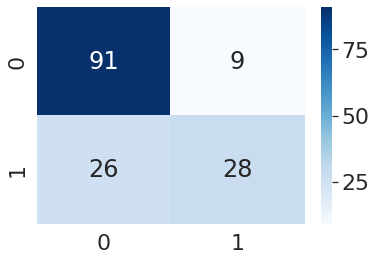

In [ ]:
y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

In [ ]:
print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

Patient with Not Diabetes Correctly Detected (True Negatives):  91
Incorrectly Detected (False Positives):  9
Diabetes Patient Missed (False Negatives):  26
Diabetes Detected (True Positives):  28
Total Diabetes:  54
Sensitivy:  0.5185185185185185
Specificity:  0.91


SVM with Polynomial kernel****

In [ ]:
import sklearn
model = sklearn.svm.SVC()
model.fit(X_train, Y_train)

SVC()

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8289902280130294


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7272727272727273


In [ ]:
cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

[[88 12]
 [30 24]]


In [ ]:
print(classification_report(Y_test, X_test_prediction, digits=5))

              precision    recall  f1-score   support

           0    0.74576   0.88000   0.80734       100
           1    0.66667   0.44444   0.53333        54

    accuracy                        0.72727       154
   macro avg    0.70621   0.66222   0.67034       154
weighted avg    0.71803   0.72727   0.71126       154



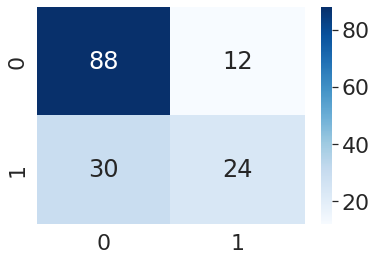

In [ ]:
y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

In [ ]:
print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

Patient with Not Diabetes Correctly Detected (True Negatives):  88
Incorrectly Detected (False Positives):  12
Diabetes Patient Missed (False Negatives):  30
Diabetes Detected (True Positives):  24
Total Diabetes:  54
Sensitivy:  0.4444444444444444
Specificity:  0.88


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = sklearn.ensemble.RandomForestClassifier(n_estimators=500,criterion='entropy')
model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.7532467532467533
[[88 12]
 [26 28]]
              precision    recall  f1-score   support

           0    0.77193   0.88000   0.82243       100
           1    0.70000   0.51852   0.59574        54

    accuracy                        0.75325       154
   macro avg    0.73596   0.69926   0.70909       154
weighted avg    0.74671   0.75325   0.74294       154

Patient with Not Diabetes Correctly Detected (True Negatives):  88
Incorrectly Detected (False Positives):  12
Diabetes Patient Missed (False Negatives):  26
Diabetes Detected (True Positives):  28
Total Diabetes:  54
Sensitivy:  0.5185185185185185
Specificity:  0.88


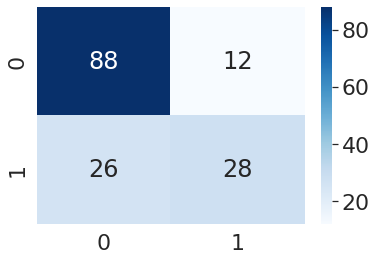

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

print(classification_report(Y_test, X_test_prediction, digits=5))

y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model =  GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

Accuracy score of the training data :  0.755700325732899
Accuracy score of the test data :  0.7727272727272727
[[88 12]
 [23 31]]
              precision    recall  f1-score   support

           0    0.79279   0.88000   0.83412       100
           1    0.72093   0.57407   0.63918        54

    accuracy                        0.77273       154
   macro avg    0.75686   0.72704   0.73665       154
weighted avg    0.76759   0.77273   0.76576       154

Patient with Not Diabetes Correctly Detected (True Negatives):  88
Incorrectly Detected (False Positives):  12
Diabetes Patient Missed (False Negatives):  23
Diabetes Detected (True Positives):  31
Total Diabetes:  54
Sensitivy:  0.5740740740740741
Specificity:  0.88


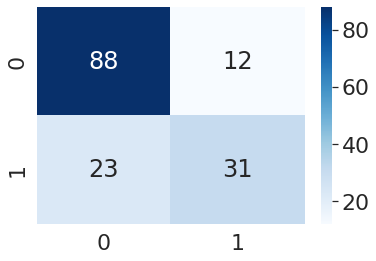

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

print(classification_report(Y_test, X_test_prediction, digits=5))

y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.6948051948051948
[[83 17]
 [30 24]]
              precision    recall  f1-score   support

           0    0.73451   0.83000   0.77934       100
           1    0.58537   0.44444   0.50526        54

    accuracy                        0.69481       154
   macro avg    0.65994   0.63722   0.64230       154
weighted avg    0.68221   0.69481   0.68324       154

Patient with Not Diabetes Correctly Detected (True Negatives):  83
Incorrectly Detected (False Positives):  17
Diabetes Patient Missed (False Negatives):  30
Diabetes Detected (True Positives):  24
Total Diabetes:  54
Sensitivy:  0.4444444444444444
Specificity:  0.83


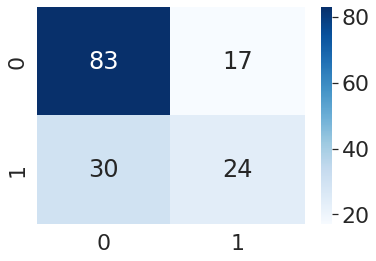

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

print(classification_report(Y_test, X_test_prediction, digits=5))

y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier()

Accuracy score of the training data :  0.8289902280130294
Accuracy score of the test data :  0.7207792207792207
[[87 13]
 [30 24]]
              precision    recall  f1-score   support

           0    0.74359   0.87000   0.80184       100
           1    0.64865   0.44444   0.52747        54

    accuracy                        0.72078       154
   macro avg    0.69612   0.65722   0.66466       154
weighted avg    0.71030   0.72078   0.70564       154

Patient with Not Diabetes Correctly Detected (True Negatives):  87
Incorrectly Detected (False Positives):  13
Diabetes Patient Missed (False Negatives):  30
Diabetes Detected (True Positives):  24
Total Diabetes:  54
Sensitivy:  0.4444444444444444
Specificity:  0.87


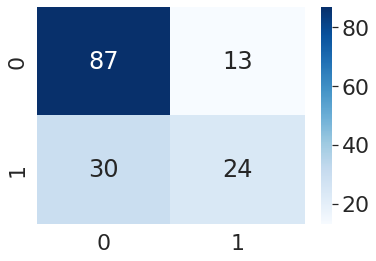

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

print(classification_report(Y_test, X_test_prediction, digits=5))

y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

Accuracy score of the training data :  0.7850162866449512
Accuracy score of the test data :  0.7597402597402597
[[89 11]
 [26 28]]
              precision    recall  f1-score   support

           0    0.77391   0.89000   0.82791       100
           1    0.71795   0.51852   0.60215        54

    accuracy                        0.75974       154
   macro avg    0.74593   0.70426   0.71503       154
weighted avg    0.75429   0.75974   0.74875       154

Patient with Not Diabetes Correctly Detected (True Negatives):  89
Incorrectly Detected (False Positives):  11
Diabetes Patient Missed (False Negatives):  26
Diabetes Detected (True Positives):  28
Total Diabetes:  54
Sensitivy:  0.5185185185185185
Specificity:  0.89


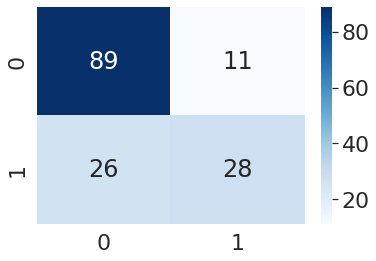

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

print(classification_report(Y_test, X_test_prediction, digits=5))

y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

LR: 0.772180 (0.036221)
KNN: 0.738243 (0.053267)
CART: 0.705639 (0.067225)
RF: 0.761671 (0.041021)
SVM: 0.761688 (0.039764)
XGB: 0.761705 (0.054089)
LightGBM: 0.731818 (0.042232)


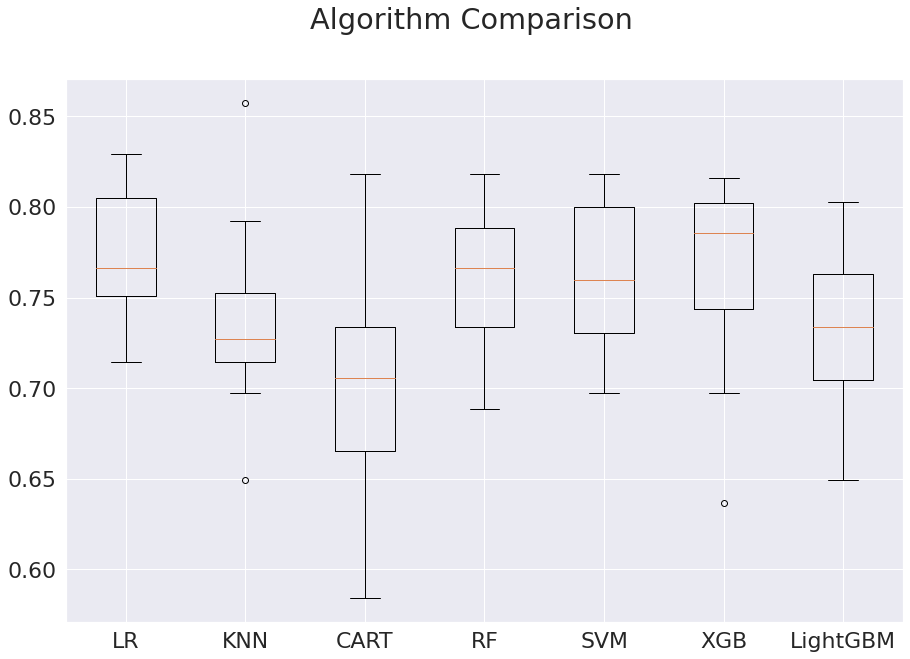

In [ ]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

for name, model in models:

        kfold = KFold(n_splits = 10, random_state = None)
        cv_results = cross_val_score(model, X, Y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Data Visulization
Correlation Matrix

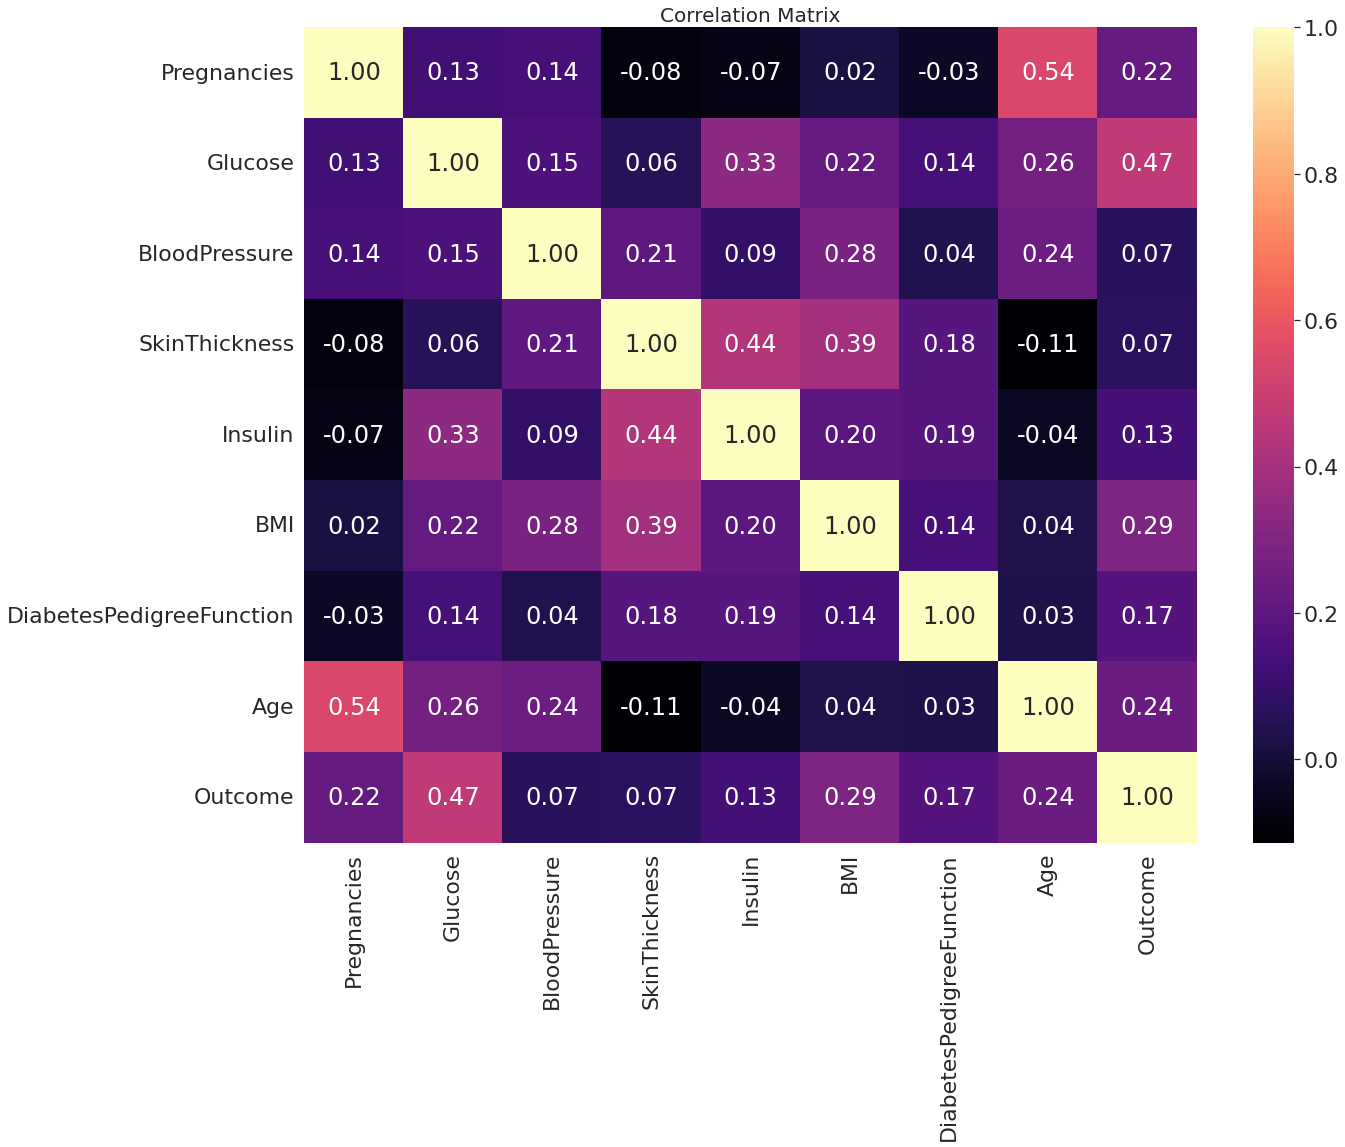

In [ ]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sn.heatmap(diabetes_dataset.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

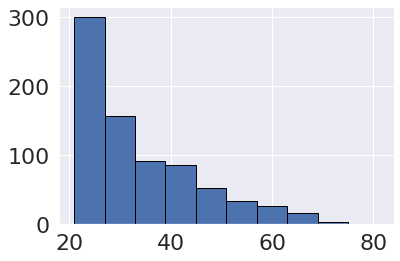

In [ ]:
# The histagram of the Age variable was reached.
diabetes_dataset["Age"].hist(edgecolor = "black")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


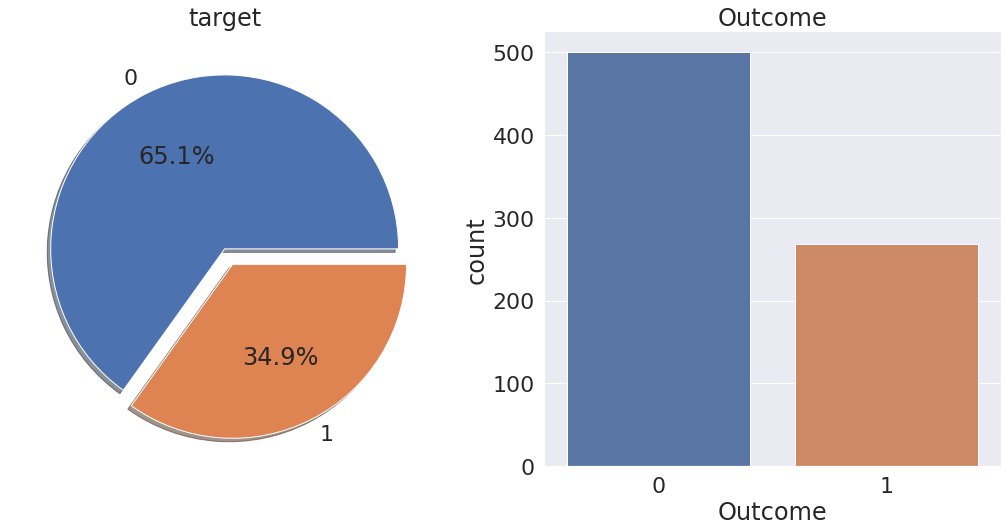

In [ ]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
diabetes_dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sn.countplot('Outcome',data=diabetes_dataset,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

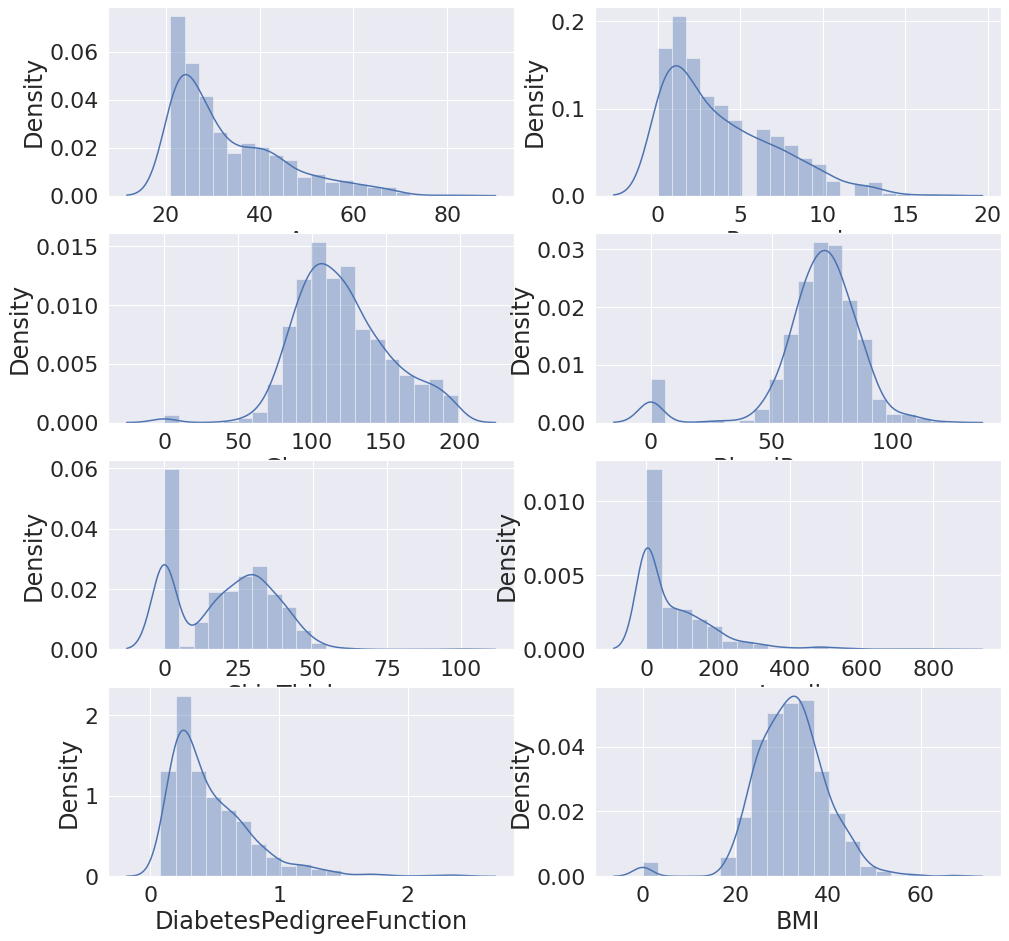

In [ ]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sn.distplot(diabetes_dataset.Age, bins = 20, ax=ax[0,0])
sn.distplot(diabetes_dataset.Pregnancies, bins = 20, ax=ax[0,1])
sn.distplot(diabetes_dataset.Glucose, bins = 20, ax=ax[1,0])
sn.distplot(diabetes_dataset.BloodPressure, bins = 20, ax=ax[1,1])
sn.distplot(diabetes_dataset.SkinThickness, bins = 20, ax=ax[2,0])
sn.distplot(diabetes_dataset.Insulin, bins = 20, ax=ax[2,1])
sn.distplot(diabetes_dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sn.distplot(diabetes_dataset.BMI, bins = 20, ax=ax[3,1])

# 3) Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [ ]:
df=diabetes_dataset

In [ ]:
li = df["BMI"].to_list()

In [ ]:
len(li)

768

In [ ]:
li = df["BMI"].to_list()
for i in range(0,len(li)):
    if li[i]<=18.5:
        li[i] = "Underweight"
    elif li[i] > 18.5 and li[i] <=24.9:
        li[i]= "Normal"
    elif li[i] > 24.9 and li[i] <=29.9:
        li[i]= "Overweight"
    elif li[i] > 29.9 and li[i] <=34.9:
        li[i]= "Obesity 1"
    elif li[i] > 34.9 and li[i] <=39.9:
        li[i]= "Obesity 2"
    elif li[i] > 39.9:
        li[i]= "Obesity 3"
df["BMI"]=li

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,Obesity 1,0.627,50,1
1,1,85,66,29,0,Overweight,0.351,31,0
2,8,183,64,0,0,Normal,0.672,32,1
3,1,89,66,23,94,Overweight,0.167,21,0
4,0,137,40,35,168,Obesity 3,2.288,33,1


In [ ]:
# A categorical variable creation process is performed according to the insulin value.
li = df["Insulin"].to_list()
for i in range(len(li)):
    if li[i] >=16 and li[i]<=166:
        li[i] = "Normal"
    else:
        li[i]="Abnormal"
df["Insulin"]=li

In [ ]:
df2=df

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,Abnormal,Obesity 1,0.627,50,1
1,1,85,66,29,Abnormal,Overweight,0.351,31,0
2,8,183,64,0,Abnormal,Normal,0.672,32,1
3,1,89,66,23,Normal,Overweight,0.167,21,0
4,0,137,40,35,Abnormal,Obesity 3,2.288,33,1


In [ ]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
li = df["Glucose"].to_list()

for i in range(len(li)):
    if li[i] <=70:
        li[i]="Low"
    elif li[i] >70 and li[i] <= 99:
        li[i]="Normal"
    elif li[i] >99 and li[i] <= 126:
        li[i]="High"
    elif li[i] > 126:
        li[i]="Extreme"
df["Glucose"]=li

In [ ]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,Extreme,72,35,Abnormal,Obesity 1,0.627,50,1
1,1,Normal,66,29,Abnormal,Overweight,0.351,31,0
2,8,Extreme,64,0,Abnormal,Normal,0.672,32,1
3,1,Normal,66,23,Normal,Overweight,0.167,21,0
4,0,Extreme,40,35,Abnormal,Obesity 3,2.288,33,1
5,5,High,74,0,Abnormal,Overweight,0.201,30,0
6,3,Normal,50,32,Normal,Obesity 1,0.248,26,1
7,10,High,0,0,Abnormal,Obesity 2,0.134,29,0
8,2,Extreme,70,45,Abnormal,Obesity 1,0.158,53,1
9,8,High,96,0,Abnormal,Underweight,0.232,54,1


Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [ ]:
df["Glucose"] = df["Glucose"].astype('category')
print(df.dtypes)
df["Glucose"] = df["Glucose"].cat.codes

Pregnancies                    int64
Glucose                     category
BloodPressure                  int64
SkinThickness                  int64
Insulin                       object
BMI                           object
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
dtype: object


In [ ]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0,72,35,Abnormal,Obesity 1,0.627,50,1
1,1,3,66,29,Abnormal,Overweight,0.351,31,0
2,8,0,64,0,Abnormal,Normal,0.672,32,1
3,1,3,66,23,Normal,Overweight,0.167,21,0
4,0,0,40,35,Abnormal,Obesity 3,2.288,33,1
5,5,1,74,0,Abnormal,Overweight,0.201,30,0
6,3,3,50,32,Normal,Obesity 1,0.248,26,1
7,10,1,0,0,Abnormal,Obesity 2,0.134,29,0
8,2,0,70,45,Abnormal,Obesity 1,0.158,53,1
9,8,1,96,0,Abnormal,Underweight,0.232,54,1


In [ ]:
df["Insulin"] = df["Insulin"].astype('category')
print(df.dtypes)
df["Insulin"] = df["Insulin"].cat.codes

Pregnancies                    int64
Glucose                         int8
BloodPressure                  int64
SkinThickness                  int64
Insulin                     category
BMI                           object
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
dtype: object


In [ ]:
df["BMI"] = df["BMI"].astype('category')
print(df.dtypes)
df["BMI"] = df["BMI"].cat.codes

Pregnancies                    int64
Glucose                         int8
BloodPressure                  int64
SkinThickness                  int64
Insulin                         int8
BMI                         category
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
dtype: object


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0,72,35,0,1,0.627,50,1
1,1,3,66,29,0,4,0.351,31,0
2,8,0,64,0,0,0,0.672,32,1
3,1,3,66,23,1,4,0.167,21,0
4,0,0,40,35,0,3,2.288,33,1
